In [2]:
#!pip install prophet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
#from xgboost import XGBRegressor
#from prophet import Prophet

# Tool to searilize both the fitted StandardScaler and the best estimator from the grid search
import joblib





# import files

In [2]:
### import and read csv file

path = '../Output/full_indicators_by_country_by_year.csv'
df = pd.read_csv(path)


df

,index,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)",...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,...,0.009,0.292137,3.299608,0.000,0.000,0.000,9.052,20.0,3.294,7.758981
1,1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,...,0.013,0.324903,4.333403,0.000,0.000,0.000,10.133,20.0,3.294,7.651162
2,2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,...,0.017,0.333475,4.353572,15.460,12.283,16.155,11.184,20.0,3.294,9.694882
3,3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,...,0.016,0.344999,3.323800,15.460,12.283,16.155,11.196,20.0,3.294,9.688910
4,4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,...,0.016,0.291267,2.974238,15.460,12.283,16.155,11.185,20.0,3.294,10.275749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,1658,Zimbabwe,ZWE,2019,30.3,46.7,39.518358,0.883387,657.0,31.518,...,3.630,6.322804,30.237235,5.615,6.506,9.125,7.373,24.0,2.396,3.666993
1659,1659,Zimbabwe,ZWE,2020,30.5,52.7,39.754073,0.877221,657.0,31.009,...,2.670,3.739823,18.681678,5.615,6.506,9.125,8.621,24.0,2.396,2.157548
1660,1660,Zimbabwe,ZWE,2021,30.5,49.0,39.385906,0.877221,657.0,30.537,...,2.670,2.281635,9.229217,7.116,8.089,11.589,9.540,24.0,2.396,3.196767
1661,1661,Zimbabwe,ZWE,2022,30.8,50.1,39.489284,0.877221,657.0,30.086,...,2.670,1.418276,6.088641,5.945,8.952,12.427,10.087,24.0,2.396,3.827232


## Inspect the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 53 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   index                                                                                                 1663 non-null   int64  
 1   country                                                                                               1663 non-null   object 
 2   iso3Code                                                                                              1663 non-null   object 
 3   year                                                                                                  1663 non-null   int64  
 4   clean fuels for cooking (% of population)                                                             

In [4]:
df.describe()

,index,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
count,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,...,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000
mean,831.000000,2019.034275,65.258328,83.683824,38.149248,1.140878,1080.260313,19.438815,23.912632,315.239622,...,5.118244,3.461613,9.987065,5.576078,6.920728,6.748378,7.088161,40.164161,1.853091,11.171426
std,480.211065,2.589557,39.562522,27.096966,22.524579,1.549332,803.647910,10.131943,39.928103,1857.934281,...,4.046082,5.889656,13.997079,5.854945,7.703278,6.619296,5.775616,21.050826,0.886108,34.368195
min,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.500000,2017.000000,25.600000,73.750000,19.602978,0.336253,460.000000,10.800000,0.000000,112.430438,...,1.420000,0.000000,0.000000,1.293000,0.480500,1.236500,3.272000,25.000000,1.564000,0.721311
50%,831.000000,2019.000000,87.500000,99.900000,39.434768,0.682330,900.000000,16.833000,0.000000,127.508994,...,4.380000,1.263797,5.002966,4.040000,4.631000,5.490000,5.255000,37.000000,2.028000,2.396329
75%,1246.500000,2021.000000,100.000000,100.000000,54.637271,1.342953,1622.000000,27.179000,44.000660,159.761076,...,8.315000,4.665517,14.570040,7.716000,10.420000,9.767500,9.498500,54.000000,2.332000,7.089806
max,1662.000000,2023.000000,100.000000,100.000000,84.563658,14.208087,3240.000000,46.558000,249.411354,38796.557297,...,16.990000,88.963244,127.580662,33.291000,46.530000,38.182000,34.007000,90.000000,3.397000,448.765894


In [5]:
df.columns

Index(['index', 'country', 'iso3Code', 'year',
       'clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Current account balance (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
       'doing business score', 'Fertility rate, total (births per woman)',
       '% Firms using banks', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GNI per capita (2015 US$)', 'government 

### correlation matrix to assess relationships

In [6]:
# drop columns to keep on features and target
df_Xy = df.drop(columns=['index', 'country','iso3Code'])

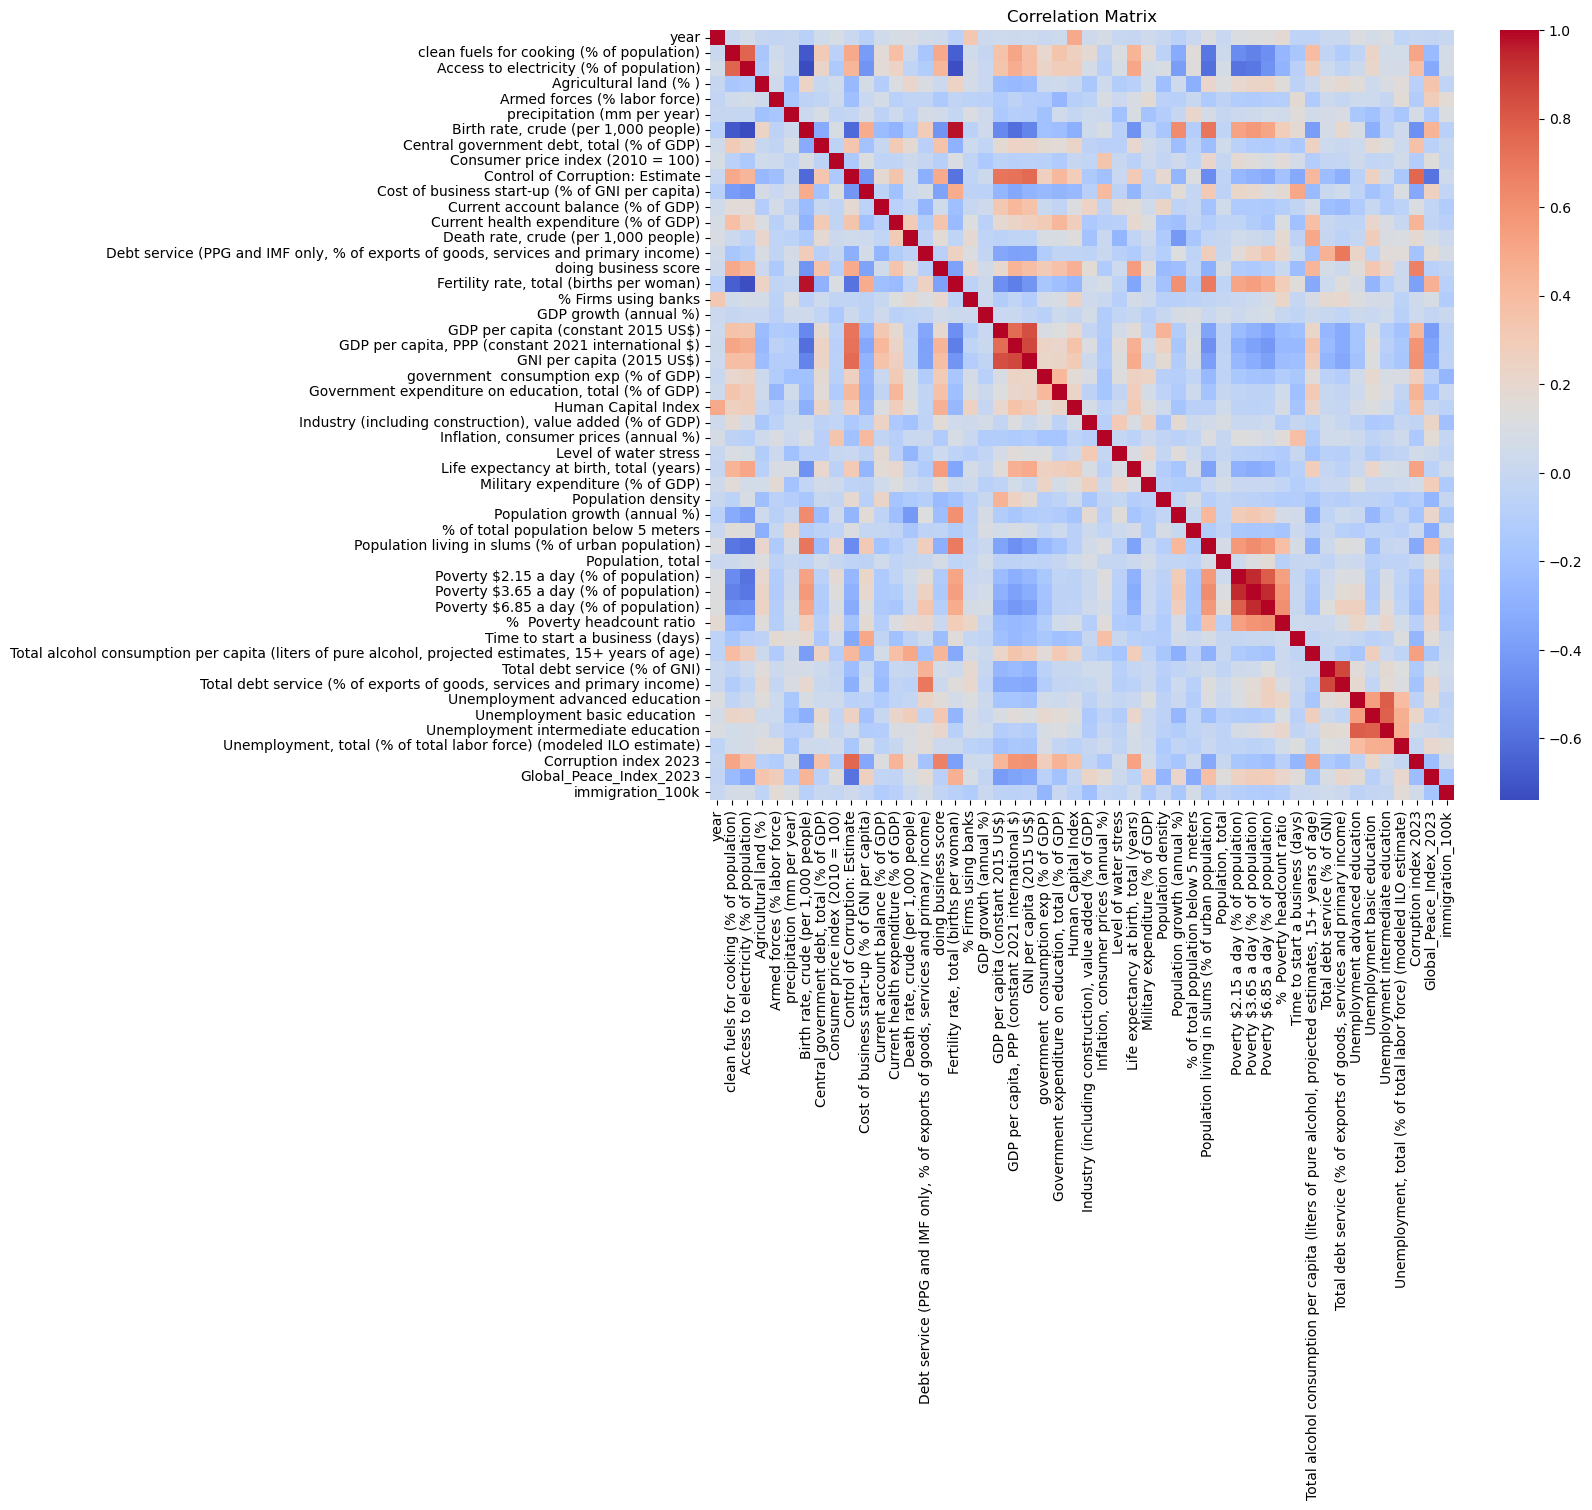

In [7]:
# Plot correlation matrix to assess relationships
plt.figure(figsize=(12,10))
corr_matrix = df_Xy.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Define the target and predictors.
# We remove columns that are identifiers or not used for prediction.
non_predictors = ['index', 'country', 'iso3Code']
target = 'immigration_100k'
predictors = [col for col in df.columns if col not in non_predictors + [target]]

# Select features and target
X = df[predictors]
y = df[target]

## Splitting the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(1330, 49)

In [11]:
X_test.shape

(333, 49)

## Regression Modelling

### --- Linear Regression ---

In [12]:
# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression MSE: 575.0567664962434
Linear Regression R2: 0.4419988746158543


### --- Random Forest Regression ---

In [13]:
# --- Random Forest Regression ---
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)
print("Random Forest Regression R2:", r2_rf)

Random Forest Regression MSE: 134.9869736634401
Random Forest Regression R2: 0.8690166126114236


The results show that the Random Forest model significantly outperforms the Linear Regression model:

- Mean Squared Error (MSE):

  - Linear Regression: 575.06
  - Random Forest: 134.99
   A lower MSE indicates that the Random Forest model's predictions are, on average, much closer to the actual values.

- R² Score:

  - Linear Regression: 0.442 (approximately 44% of the variance explained)
  - Random Forest: 0.869 (approximately 87% of the variance explained)
   The higher R² score of the Random Forest model means it captures a significantly larger proportion of the variability in immigration_100k.
   
In summary, the Random Forest model is more accurate and reliable for predicting immigration per 100k, likely due to its ability to capture non-linear relationships and interactions among the predictors that a simple linear model might miss.

## Feature Importance & Key Variable Analysis

In [14]:
# Use Random Forest to gauge feature importance
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 Unemployment, total (% of total labor force) (modeled ILO estimate)                                     0.389351
Armed forces (% labor force)                                                                            0.128361
government  consumption exp (% of GDP)                                                                  0.076217
Population, total                                                                                       0.070851
Population density                                                                                      0.039362
Total debt service (% of GNI)                                                                           0.020839
Fertility rate, total (births per woman)                                                                0.019454
Level of water stress                                                                                   0.018755
Debt service (PPG and IMF only, % of exports of goods, services and primar

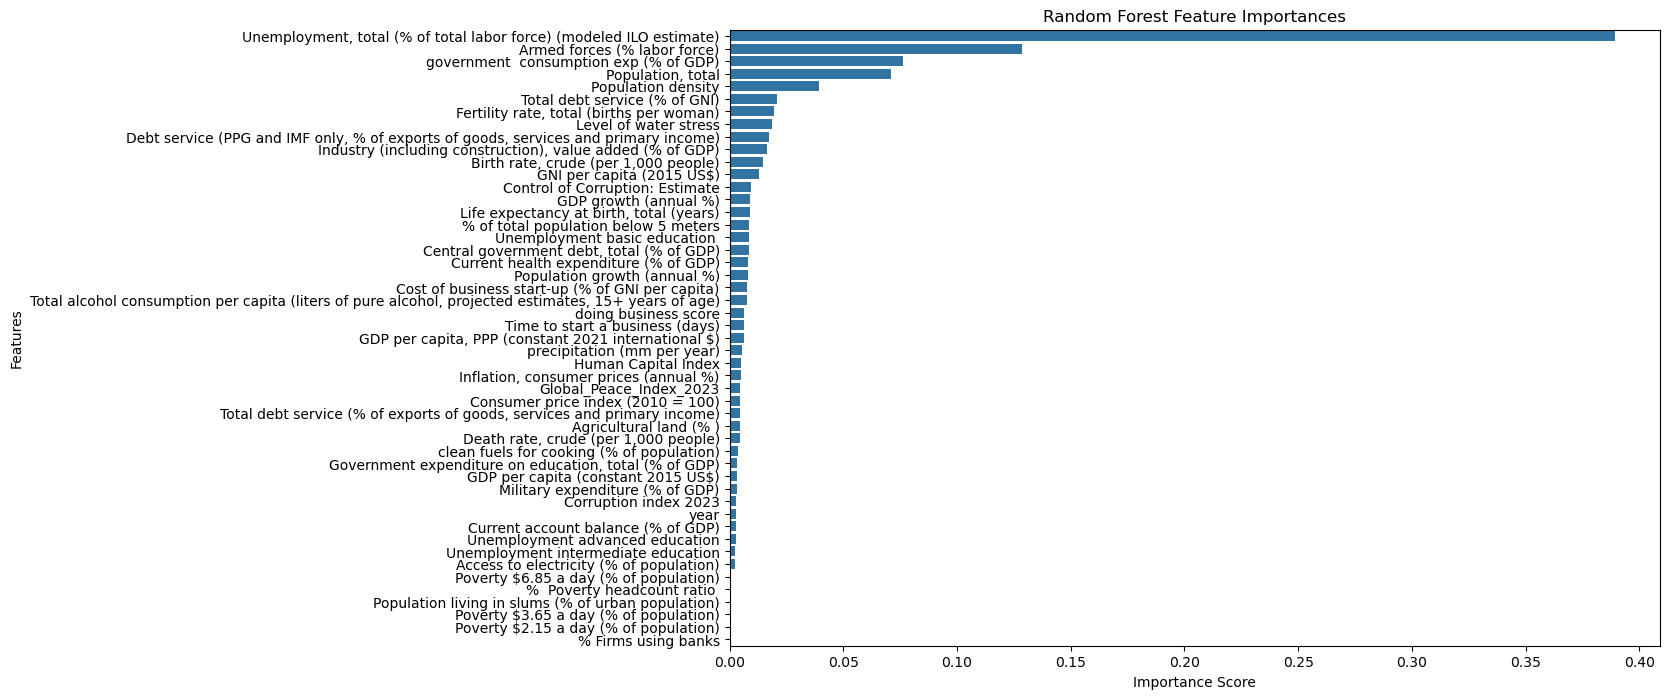

In [15]:
# Plot feature importances
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### Actual vs Predicted Values

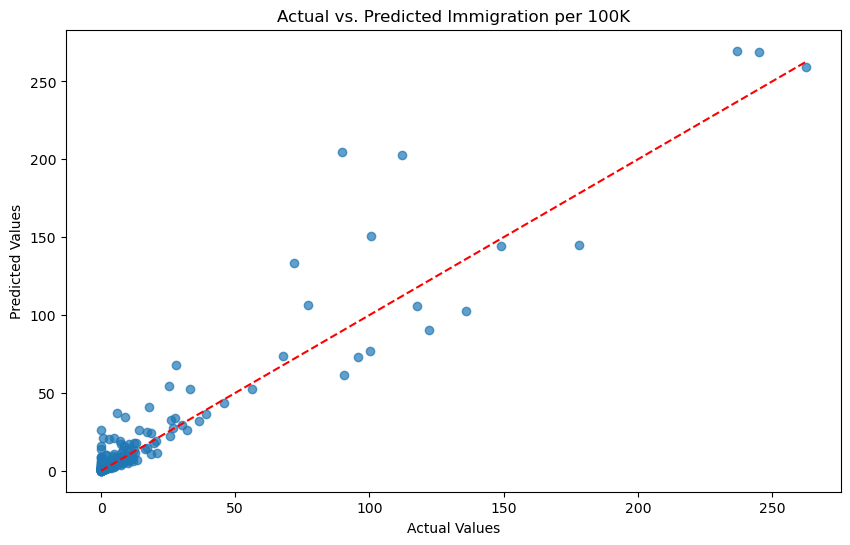

In [16]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.title('Actual vs. Predicted Immigration per 100K')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

## Steps to Save and Deploy the Model


In [17]:
## Steps to Save and Deploy the Model

# Save the best RandomForestRegressor model obtained from GridSearchCV
joblib.dump(rf, '../rf_all_countries_all_features.pkl')

['../rf_all_countries_all_features.pkl']

## Deploying for Future Forecasts

In [18]:
# Load the model (or the pipeline if you created one)

rf = joblib.load('../rf_all_countries_all_features.pkl')

# For new data (assume new_data is a DataFrame or array with the same feature columns):
# If using separate scaler and model
# Top Features = [ 'government consumption exp (% of GDP)',	'Unemployment intermediate education',	
#                   'Birth rate, crude (per 1,000 people)',	'doing business score',	
#                   'Population living in slums (% of urban population)'
#                ]
# Your new_data as a list of feature values for a single sample
Afghanistan_2016 = [2016,28.8,97.7,58.12366803,3.635915415,327,37.936,0,138.7086655,-1.540227771,19.9,
            -14.95019519,11.81859016,7.077,3.735882022,38.93563,5.262,0,2.260314203,
            563.8723367,2958.785399,568.9771139,0,4.543970108,0,10.46680769,4.383891955,
            54.75701944,63.136,0.956772141,53.20302961,2.535719918,0,72.12863,34700612,
            0,0,0,54.5,8.5,0.013,0.324902542,4.333403208,0,0,0,10.133,20,3.294
           ]# Actual = 7.651161887288904

Algeria_2019 =[ 2016,99.6,99.4,17.36553219,2.602183701,89,25.166,0,134.8448702,
               	-0.673700511,11.1,-14.49628776,6.58904791,4.472,0.47564693,46.10981,3.051,
                0,3.9,4768.731401,15511.68588,4748.948829,20.02184261,6.502108574,0,
                32.20516405,6.397694803,129.8719572,75.732,6.384928983,17.15162186,
                2.055691112,1.245668104,21.07581,40850721,0,0,0,0,18,0.6,0.198588642,1.014038027,
                0,0,0,10.202,36,2.11
              ] # Actual = 6.890943246754445
Colombia_2015 = [ 2015,	89.4,	98.2,	40.36448851,	2.023967375,	3240,	15.585,	53.27858747,	117.5883756,
                 -0.352601826,	14.3,	-6.372304422,	7.52338552,	5.168,	9.415310023,	68.85918,	1.863,	0,
                 2.955901375,	6248.514905,	16791.3806,	6167.082288,	14.81162979,	0,	0,	28.58944789,	
                 4.989831158,	3.88559941,	76.257,	3.109960084,	42.33433078,	0.864942377,	2.341056135,	0,
                 46969940,	4.9,	13,	34.6,	0,	12,	5.02,	4.915014987,	27.59076169,	10.61,	6.62,	10.1,
                8.572,	40,	2.887
                ] # Actual = 4.641266307770459


# Convert the list to a NumPy array and reshape it to a 2D array
new_data_array = np.array(Colombia_2015).reshape(1, -1)


# Use the best model to predict using the scaled new data
predictions = rf.predict(new_data_array)
print("Predictions:", predictions)

Predictions: [4.57844616]


c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
